In [105]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Dataset Analysis

In [2]:
# Load info_01.csv
df1 = pd.read_csv("ds\\info_01.csv")
def check_diff(arr1,arr2):
    arr3 = arr1 - arr2
    return sum(arr3)

In [3]:
df1 = pd.read_csv("ds\\info_01.csv").drop_duplicates()

In [4]:
#Apparently id and id2 are the same lets check with a quick aggregation
check_diff(df1["id"],df1["id2"])

0

In [5]:
df2 = pd.read_csv("ds\\info_02.csv")

In [6]:
# I do have the same problem as in dataset 1. The id and id2 seems to be the same. Let me do a quick verification.
check_diff(df2["id"],df2["id2"])

0

Given the information above it was found that both datasets can use only one attribute related to the id. Thus, I am going to leave only id. 

In [7]:
df1 = df1.drop(columns=["id2"])
df2 = df2.drop(columns=["id2"])

In [8]:
df2 = df2.drop_duplicates()
print("amount of good registers in info_01 ",len(df1))
print("amount of good registers in info_02 ",len(df2))

amount of good registers in info_01  8143
amount of good registers in info_02  9143


# Dataset description

### info_01

It has 17286 registros and contains the next attributes:

    - id: type integer
    - id2: type integer
    - v4: type float
    - v5: type float
    - v6: type float

It was found that the info_01 has a lot of duplicate registers. Thus, it was needed to remove duplicates. After removing the dupliate vales only 8143 registers left. It was found that id and id2 were attributes with the same identification number. Therefore, I decided to erase id2 column.

### info_02

It has 17286 registers and contains the next attributes:
    - id: type integer 
    - id2: type integer
    - v1: type float
    - c1: type integer
    - v2: type float
    - v3: type timestamp

This dataset did contain duplicate registers, I remove duplicates. After removing duplicates the dataset has 9143. However, attribute id and id2 had the same value. I decided to erase id2.

I am interested in bring attributes from df1 to df2. I want df2 to be my pivot given that its the dataset with the dependent variable. I will perform a left join operation.

In [9]:
df_final = df2.merge(df1, how='left', on=['id'])

# Descriptive analytics from attribute perspective

In [10]:
print("The amount of registers without value in the dependent variable are", len(df_final[df_final["c1"].isnull()]))

The amount of registers without value in the dependent variable are 0


In [11]:
# id1 
print("Amount of unique id's in ID attribute" , len(df_final['id'].unique()))

Amount of unique id's in ID attribute 8143


In [12]:
#v1
df_final["v1"].unique()

array([ 426. ,  429.5,  419. ,  418.5,    0. ,  356. ,  423.7,  411. ,
        408.3,  400. ,  396. ,  398.3,  399.5,  413. ,  412.2,  405. ,
        412. ,  422.5,  428.3,  424.6,  433. ,  426.7,  436.3,  429. ,
        434. ,  444. ,  441.8,  446. ,  439. ,  446.5,  451.5,  455.2,
        447.3,  455.7,  454. ,  457.3,  465.7,  465.5,  469.7,  478.5,
        471.2,  473. ,  484.5,  482.5,  487.5,  490. ,  492. ,  497.2,
        495.5,  497. ,  494. ,  498.7,  504.2,  506. ,  505.8,  505.5,
        518.5,  508.5,  503.7,  496.3,  503. ,  489.5,  478. ,  483.2,
        484. ,  476. ,  486.5,  476.2,  469. ,  459. ,  460.2,  466.5,
        450.2,  457.8,  462.3,  456.5,  461.5,  449.5,  460. ,  453. ,
        454.8,  455.5,  464. ,  444.2,  463. ,  471. ,  474. ,  479. ,
        465.2,  466.8,  442.8,  448. ,  454.7,  449.3,  440.2,  458.5,
        481.5,  471.5,  489. ,  504. ,  502.3,  524. ,  550. ,  554.2,
        562.3,  568.5,  606.5,  696.5,  657.2,  744. ,  708.8,  607. ,
      

In [13]:
#v1 How many nulls. The v1 is empty in dataset info_01
float(len(df_final[df_final["v1"].isna()]))/float(len(df_final["v1"]))

0.0

In [14]:
#v1 amoutn of money transfer during the transaction
df_final["v1"].hist(bins=10)

In [15]:
#v2
df_final["v2"].unique()

array([23.2, 23.1, 23. , 22.9, 22.8, 22.7, 22.6, 22.5, 22.4, 22.3, 22.2,
       22.1, 22. , 21.9, 21.8, 21.7, 21.6, 21.5, 21.4, 21.3, 21.2, 21.1,
       21. , 20.9, 20.8, 20.7, 20.6, 20.5, 20.4, 20.3, 20.2, 20.1, 20. ,
       19.9, 19.8, 19.7, 19.6, 19.5, 19.4, 19.3, 19.2, 19.1, 19. ])

In [16]:
#v2 How many nulls. 
float(len(df_final[df_final["v2"].isnull()]))/float(len(df_final["v2"]))

0.0

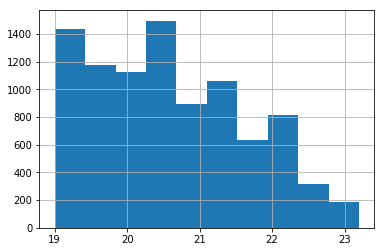

In [17]:
#v2 months with the service
df_final["v2"].hist(bins=10)

In [18]:
# v3 
df_final["v3"].unique()

array(['2015-02-04 17:51:00', '2015-02-04 17:51:59',
       '2015-02-04 17:53:00', ..., '2015-02-10 09:32:00',
       '2015-02-10 09:33:00', nan], dtype=object)

In [19]:
def time(string_date):
    return pd.to_datetime(string_date)
def get_day(date):
    return date.day
def get_hour(date):
    return date.hour
def get_min(date):
    return date.minute
def get_second(date):
    return date.second

In [20]:
df_final["v3"] = list(map(time,df_final["v3"]))

In [21]:
print("minimum date", df_final["v3"].min())
print("maximum date", df_final["v3"].max())

minimum date 2015-02-04 17:51:00
maximum date 2015-02-10 09:33:00


In [22]:
#v3 How many nulls.
float(len(df_final[df_final["v3"].isnull()]))/float(len(df_final["v3"]))

0.10937329104232746

I notice that the timestamp variable has around 5% null values. I am not going to erase them to "clean" the information. It might be a good indicator of fraud.

In [23]:
#v4
df_final["v4"].unique()

array([721.2, 714. , 713.5, ..., 761. , 771.3, 787.2])

In [24]:
#v4 How many nulls. 
float(len(df_final[df_final["v4"].isnull()]))/float(len(df_final["v4"]))

0.0

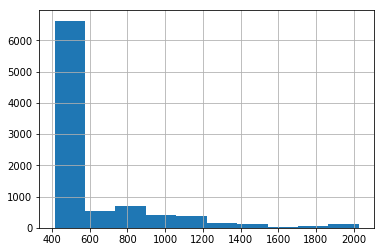

In [25]:
#v4 balance on the account
df_final["v4"].hist()

In [26]:
#v5
df_final["v5"].unique()

array([27.3, 27.2, 27.1, 27.4, 27.5, 27.6, 27. , 26.9, 26.8, 26.7, 26.6,
       26.5, 26.4, 26.3, 26.2, 26.1, 26. , 25.9, 25.8, 25.7, 25.6, 25.5,
       25.4, 25.3, 25.2, 25.1, 25. , 24.9, 24.8, 24.7, 24.6, 24.5, 24.4,
       24.3, 24.2, 24.1, 24. , 23.9, 23.8, 23.7, 23.6, 23.5, 23.4, 23.3,
       23.2, 23.1, 23. , 22.9, 22.8, 22.7, 22.6, 22.5, 22.4, 27.7, 28. ,
       28.1, 28.2, 28.4, 28.5, 28.3, 27.8, 21.9, 21.7, 22. , 22.1, 21.5,
       21.3, 21.2, 21.6, 21.4, 21.1, 20.9, 20.6, 20.7, 20.8, 20.5, 20.4,
       20.3, 20.1, 20.2, 20. , 19.9, 19.8, 19.6, 19.3, 19.4, 19.7, 19.5,
       19.2, 21. , 19.1, 19. , 18.9, 18.8, 18.7, 18.6, 18.5, 18.4, 21.8,
       18.3, 18.2, 18.1, 18. , 17.9, 17.8, 17.7, 17.6, 17.5, 17.4, 17.3,
       17.2, 17.1, 17. , 16.9, 16.8, 16.7, 22.2, 22.3, 27.9, 28.6, 28.7,
       28.8, 28.9, 29. , 29.1, 29.2, 29.3, 29.4, 29.5, 29.6, 29.7, 29.8,
       29.9, 30. , 30.1, 30.2, 30.3, 30.4, 30.5, 30.6, 30.7, 30.8, 30.9,
       31. , 31.1, 31.2, 31.3, 31.4, 31.5, 31.6, 31

In [27]:
#v5 How many nulls. 
float(len(df_final[df_final["v5"].isnull()]))/float(len(df_final["v5"]))

0.0

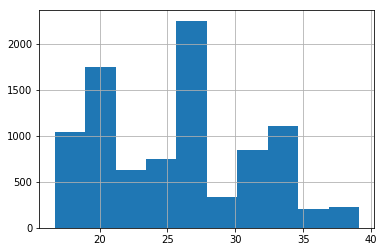

In [28]:
#v5 customer age
df_final["v5"].hist()

In [29]:
#v6
df_final["v6"].unique()

array([0.00479299, 0.00478344, 0.00477946, ..., 0.00556273, 0.00559564,
       0.00562145])

In [30]:
#v6 How many nulls. 
float(len(df_final[df_final["v6"].isnull()]))/float(len(df_final["v6"]))

0.0

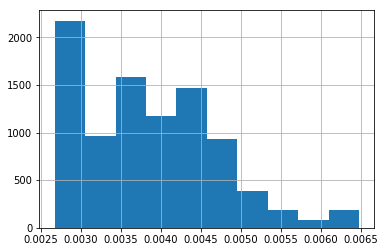

In [31]:
#v6 the attribue correspond to an account existent
df_final["v6"].hist()

In [32]:
df_box = df_final.drop(columns = ['id','c1','v3'])
sc_box = MinMaxScaler()
df_box = pd.DataFrame(sc_box.fit_transform(df_box), columns = df_box.columns)

The dataset has 6 attributes that can be use to identify label c1:

- v1: It seems to be the amount of money involved in a transaction at the moment of checking the account. Most of the values are above the median and there are a couple of outliers, which might be good to identify fraud. It was a skewed distribution to a tendency to be an exponential distribution to the left. 

- v2: it seems the amount of time with the service range from 19.0 - 23.0. It has a very nice exponential distribution to the left. I does not have outliers.

- v3: It is the timestamp at the moment of the account verification ranging from the 2015-02-04 - 2015-02-10. 6 days of information. It has some missing values, which I decided to keep in case it turn out to be a good indicator of fraud.

- v4: It is the balance of the account ranging from 400 to 2000. Most of the values are above the median and it has a lot of outliers. It has a lot of outliers.  

- v5: It represents the ages of the customers. The distribution tend to be normal. It does not have outliers.

- v6: Its an attribute related to the account itself. It has a very nice distribution to the left, it has some outliers which might be good to detect fraud. 

Visualization available on the box plot.

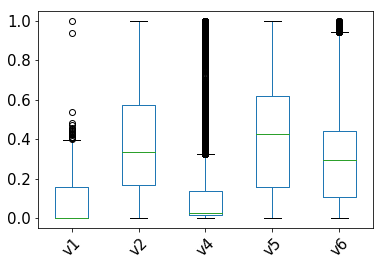

In [33]:
boxplot = pd.DataFrame(df_box).boxplot(grid=False, rot=45, fontsize=15)

# Feature Engineering: Machine Learning Model

For the feature engineering part, I decided to decompose the timestamp in day, hour, minute and second to check which timeslot might be more likeable for the fraudsters.

In [34]:
df_final["day"] = list(map(get_day, df_final["v3"]))

In [35]:
df_final["hour"] = list(map(get_hour, df_final["v3"]))

In [36]:
df_final["minute"] = list(map(get_min, df_final["v3"]))

In [37]:
df_final["second"] = list(map(get_second, df_final["v3"]))

I decided to create a feature v7, which is the difference between the transaction balance "v1" and the total balance "v4". 

In [38]:
df_final["v7"] = df_final["v4"] - df_final["v1"]

I decided to drop the timestamp. And fill the empty values of the timestamp with the value 11 all of them. 

In [39]:
df_final = df_final.drop(columns=["v3"])

In [40]:
df_final

,id,v1,c1,v2,v4,v5,v6,day,hour,minute,second,v7
0,1,426.0,1,23.2,721.2,27.3,0.004793,4.0,17.0,51.0,0.0,295.2
1,2,429.5,1,23.1,714.0,27.3,0.004783,4.0,17.0,51.0,59.0,284.5
2,3,426.0,1,23.1,713.5,27.2,0.004779,4.0,17.0,53.0,0.0,287.5
3,4,426.0,1,23.1,708.2,27.2,0.004772,4.0,17.0,54.0,0.0,282.2
4,5,426.0,1,23.1,704.5,27.2,0.004757,4.0,17.0,55.0,0.0,278.5
5,6,419.0,1,23.1,701.0,27.2,0.004757,4.0,17.0,55.0,59.0,282.0
6,7,419.0,1,23.1,701.7,27.2,0.004757,4.0,17.0,57.0,0.0,282.7
7,8,419.0,1,23.1,699.0,27.2,0.004757,4.0,17.0,57.0,59.0,280.0
8,9,419.0,1,23.1,689.3,27.2,0.004757,4.0,17.0,58.0,59.0,270.3
9,10,419.0,1,23.1,688.0,27.2,0.004745,4.0,18.0,0.0,0.0,269.0


In [41]:
# check amount of registers per customer.
df_cust = pd.DataFrame(df_final["id"], columns=["id"])
df_cust["val_count"] = 1
df_cust = df_cust.groupby(["id"]).sum().reset_index()
df_cust.sort_values(by=["val_count"], ascending=False)

,id,val_count
4071,4072,2
3311,3312,2
6963,6964,2
3279,3280,2
6965,6966,2
3281,3282,2
6971,6972,2
3288,3289,2
3291,3292,2
1311,1312,2


Drawbacks of handling too less data. I cannot include mean values over time to detect inusual movements. I cannot include lags, we have just 2 observations at maximum per customer. Given the lack of data, I cannot proceed any further to create more attributes related to time. 

# Machine Learning Model implementation

For this kind of implementation I decided to proceed with a feed forward neural network.

In [42]:
# First I am going to separate my data into x and y.
y = df_final["c1"]
x = df_final.drop(columns=["id","c1"])

In [ ]:
# imbalance data check, not imabalance it has 20% fraud.
uno = y[y==1] 
len(uno)/len(y)

In [43]:
# I am going to fill empty values with the mean day, hour, minute and second. 
x["day"] = x["day"].fillna(x["day"].mean())
x["hour"] = x["hour"].fillna(x["hour"].mean())
x["minute"] = x["minute"].fillna(x["minute"].mean())
x["second"] = x["second"].fillna(x["second"].mean())

In [44]:
# Then I am going to normalize the values
x

,v1,v2,v4,v5,v6,day,hour,minute,second,v7
0,426.0,23.2,721.2,27.3,0.004793,4.000000,17.000000,51.00000,0.000000,295.2
1,429.5,23.1,714.0,27.3,0.004783,4.000000,17.000000,51.00000,59.000000,284.5
2,426.0,23.1,713.5,27.2,0.004779,4.000000,17.000000,53.00000,0.000000,287.5
3,426.0,23.1,708.2,27.2,0.004772,4.000000,17.000000,54.00000,0.000000,282.2
4,426.0,23.1,704.5,27.2,0.004757,4.000000,17.000000,55.00000,0.000000,278.5
5,419.0,23.1,701.0,27.2,0.004757,4.000000,17.000000,55.00000,59.000000,282.0
6,419.0,23.1,701.7,27.2,0.004757,4.000000,17.000000,57.00000,0.000000,282.7
7,419.0,23.1,699.0,27.2,0.004757,4.000000,17.000000,57.00000,59.000000,280.0
8,419.0,23.1,689.3,27.2,0.004757,4.000000,17.000000,58.00000,59.000000,270.3
9,419.0,23.1,688.0,27.2,0.004745,4.000000,18.000000,0.00000,0.000000,269.0


In [45]:
sc = MinMaxScaler()
x_scale = sc.fit_transform(x)

In [100]:
# setting up the feed forward neural network.
def build_nn(optimizer='adam'):
    classifier = Sequential()
    classifier.add(Dense(units=10,kernel_initializer = "uniform", activation = "relu", input_dim=10))
    classifier.add(Dense(units=10,kernel_initializer = "uniform", activation="relu"))
    classifier.add(Dense(units = 1, kernel_initializer = "uniform", activation="sigmoid")) 
    classifier.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return classifier

# Hyperparameter Tunning

In [75]:
classifier = KerasClassifier(build_fn = build_nn)

In [76]:
parameters = {
    'batch_size':[10,20,100],
    'nb_epoch':[20,50,250],
    'optimizer':['adam','RMSprop']
}

In [77]:
X_train, X_test, y_train, y_test = train_test_split(x_scale,y,test_size=0.2,random_state=0)

In [78]:
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10, verbose=1)
grid_search = grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
Epoch 1/1
6582/6582 [==============================] - 0s 25us/step - loss: 0.4061 - accuracy: 0.8409
Epoch 1/1
6582/6582 [==============================] - 0s 27us/step - loss: 0.3963 - accuracy: 0.8435
Epoch 1/1
6582/6582 [==============================] - 0s 23us/step - loss: 0.3725 - accuracy: 0.8394
Epoch 1/1
6582/6582 [==============================] - 0s 23us/step - loss: 0.3821 - accuracy: 0.8286
Epoch 1/1
6583/6583 [==============================] - 0s 24us/step - loss: 0.4704 - accuracy: 0.7901
Epoch 1/1
6583/6583 [==============================] - 0s 24us/step - loss: 0.3866 - accuracy: 0.8403
Epoch 1/1
6583/6583 [==============================] - 0s 23us/step - loss: 0.4106 - accuracy: 0.8253
Epoch 1/1
6583/6583 [==============================] - 0s 26us/step - loss: 0.4570 - accuracy: 0.7892
Epoch 1/1
6583/6583 [==============================] - 0s 24us/step - loss: 0.3637 - accuracy: 0.8542
Epoch 1/1
6583/6583

6583/6583 [==============================] - 0s 4us/step - loss: 0.6651 - accuracy: 0.7808
Epoch 1/1
6582/6582 [==============================] - 0s 4us/step - loss: 0.6739 - accuracy: 0.7902
Epoch 1/1
6582/6582 [==============================] - 0s 4us/step - loss: 0.6731 - accuracy: 0.7826
Epoch 1/1
6582/6582 [==============================] - 0s 3us/step - loss: 0.6720 - accuracy: 0.7852
Epoch 1/1
6582/6582 [==============================] - 0s 3us/step - loss: 0.6751 - accuracy: 0.7850
Epoch 1/1
6583/6583 [==============================] - 0s 3us/step - loss: 0.6747 - accuracy: 0.7893
Epoch 1/1
6583/6583 [==============================] - 0s 4us/step - loss: 0.6699 - accuracy: 0.7864
Epoch 1/1
6583/6583 [==============================] - 0s 4us/step - loss: 0.6793 - accuracy: 0.7797
Epoch 1/1
6583/6583 [==============================] - 0s 4us/step - loss: 0.6682 - accuracy: 0.7885
Epoch 1/1
6583/6583 [==============================] - 0s 4us/step - loss: 0.6782 - accuracy: 0.7799


In [79]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [80]:
best_parameters

{'batch_size': 10, 'nb_epoch': 20, 'optimizer': 'adam'}

In [81]:
best_accuracy

0.9097358958833247

# Model selection

The model to be use is a feedforward neural network with the next configuration:
    - batch_size:10
    - nb_epoch: 20
    - optimizer: 'adam'
    
Why? Because it gave the best accuracy according to the grid search.

In [101]:
classifier = KerasClassifier(build_fn = build_nn, batch_size=10,nb_epoch=20)
accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv = 10, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/1
732/732 [==============================] - 0s 7us/step
Epoch 1/1
732/732 [==============================] - 0s 7us/step
Epoch 1/1
732/732 [==============================] - 0s 10us/step
Epoch 1/1
732/732 [==============================] - 0s 7us/step
Epoch 1/1
731/731 [==============================] - 0s 8us/step
Epoch 1/1
731/731 [==============================] - 0s 7us/step
Epoch 1/1
731/731 [==============================] - 0s 8us/step
Epoch 1/1
731/731 [==============================] - 0s 8us/step
Epoch 1/1
731/731 [==============================] - 0s 8us/step
Epoch 1/1
731/731 [==============================] - 0s 7us/step


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    7.5s finished


In [102]:
accuracies.mean()

0.9474970579147339